In [1]:
import pandas as pd

In [2]:
pd.set_option('max.columns', None)

In [3]:
df = pd.read_csv('final_cleaned_dataset.csv', index_col=0)

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

In [7]:
df

,Host Since,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Calendar Updated,Availability 60,Review Scores Rating,Cancellation Policy,Reviews per Month,Entire home/apt,apartment,bed_breakfast,hoster,house,other,Amenities : Fire extinguisher,Amenities : Baby bath,Amenities : Washer,Amenities : Free parking on premises,Amenities : Cat(s),Amenities : Private living room,Amenities : Pool,Amenities : Cable TV,Amenities : Essentials,Amenities : Children’s dinnerware,Amenities : Washer / Dryer,Amenities : Keypad,Amenities : Crib,Amenities : Changing table,Amenities : First aid kit,Amenities : Internet,Amenities : Babysitter recommendations,Amenities : Gym,Amenities : 24-hour check-in,Amenities : Buzzer/wireless intercom,Amenities : translation missing: en.hosting_amenity_50,Amenities : Hangers,Amenities : Children’s books and toys,Amenities : Wireless Internet,Amenities : Fireplace guards,Amenities : Pets live on this property,Amenities : Air conditioning,Amenities : Kitchen,Amenities : Smoking allowed,Amenities : Paid parking off premises,Amenities : Shampoo,Amenities : Smoke detector,Amenities : Pack ’n Play/travel crib,Amenities : Other pet(s),Amenities : Table corner guards,Amenities : Game console,Amenities : Lock on bedroom door,Amenities : Free parking on street,Amenities : Dog(s),Amenities : Window guards,Amenities : Private entrance,Amenities : Self Check-In,Amenities : Stair gates,Amenities : Safety card,Amenities : High chair,Amenities : Lockbox,Amenities : Elevator in building,Amenities : Laptop friendly workspace,Amenities : Carbon monoxide detector,Amenities : TV,Amenities : Indoor fireplace,Amenities : Hair dryer,Amenities : Room-darkening shades,Amenities : Pets allowed,Amenities : Baby monitor,Amenities : Smartlock,Amenities : translation missing: en.hosting_amenity_49,Amenities : Family/kid friendly,Amenities : Dryer,Amenities : Heating,Amenities : Bathtub,Amenities : Wheelchair accessible,Amenities : Doorman Entry,Amenities : Suitable for events,Amenities : Hot tub,Amenities : Outlet covers,Amenities : Breakfast,Amenities : Doorman,Amenities : Iron,Host Verifications : phone,Host Verifications : government_id,Host Verifications : google,Host Verifications : selfie,Host Verifications : None,Host Verifications : sesame,Host Verifications : linkedin,Host Verifications : sent_id,Host Verifications : offline_government_id,Host Verifications : weibo,Host Verifications : reviews,Host Verifications : email,Host Verifications : manual_offline,Host Verifications : photographer,Host Verifications : facebook,Host Verifications : kba,Host Verifications : manual_online,Host Verifications : amex,Host Verifications : work_email,Features : Host Is Superhost,Features : Instant Bookable,Features : Require Guest Phone Verification,Features : Host Has Profile Pic,Features : Is Location Exact,Features : Require Guest Profile Picture,Features : Host Identity Verified,Neighbourhood Cleansed : Palais-Bourbon,Neighbourhood Cleansed : Observatoire,Neighbourhood Cleansed : Vaugirard,Neighbourhood Cleansed : Entrepôt,Neighbourhood Cleansed : Ménilmontant,Neighbourhood Cleansed : Bourse,Neighbourhood Cleansed : Hôtel-de-Ville,Neighbourhood Cleansed : Opéra,Neighbourhood Cleansed : Luxembourg,Neighbourhood Cleansed : Buttes-Montmartre,Neighbourhood Cleansed : Gobelins,Neighbourhood Cleansed : Popincourt,Neighbourhood Cleansed : Élysée,Neighbourhood Cleansed : Batignolles-Monceau,Neighbourhood Cleansed : Passy,Neighbourhood Cleansed : Temple,Neighbourhood Cleansed : Panthéon,Neighbourhood Cleansed : Louvre,Neighbourhood Cleansed : Buttes-Chaumont,Neighbourhood Cleansed : Reuilly,30 nearest POI average
0,1884.0,2,1.0,1.0,1.0,1,50.0,500.0,30.0,1,0,4,15,80.0,0,0.16,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
scale = StandardScaler().fit(X=df)

In [11]:
X = scale.transform(df)

In [15]:
df_X = pd.DataFrame(data = X, columns=df.columns)

In [16]:
df_X.describe()

,Host Since,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Calendar Updated,Availability 60,Review Scores Rating,Cancellation Policy,Reviews per Month,Entire home/apt,apartment,bed_breakfast,hoster,house,other,Amenities : Fire extinguisher,Amenities : Baby bath,Amenities : Washer,Amenities : Free parking on premises,Amenities : Cat(s),Amenities : Private living room,Amenities : Pool,Amenities : Cable TV,Amenities : Essentials,Amenities : Children’s dinnerware,Amenities : Washer / Dryer,Amenities : Keypad,Amenities : Crib,Amenities : Changing table,Amenities : First aid kit,Amenities : Internet,Amenities : Babysitter recommendations,Amenities : Gym,Amenities : 24-hour check-in,Amenities : Buzzer/wireless intercom,Amenities : translation missing: en.hosting_amenity_50,Amenities : Hangers,Amenities : Children’s books and toys,Amenities : Wireless Internet,Amenities : Fireplace guards,Amenities : Pets live on this property,Amenities : Air conditioning,Amenities : Kitchen,Amenities : Smoking allowed,Amenities : Paid parking off premises,Amenities : Shampoo,Amenities : Smoke detector,Amenities : Pack ’n Play/travel crib,Amenities : Other pet(s),Amenities : Table corner guards,Amenities : Game console,Amenities : Lock on bedroom door,Amenities : Free parking on street,Amenities : Dog(s),Amenities : Window guards,Amenities : Private entrance,Amenities : Self Check-In,Amenities : Stair gates,Amenities : Safety card,Amenities : High chair,Amenities : Lockbox,Amenities : Elevator in building,Amenities : Laptop friendly workspace,Amenities : Carbon monoxide detector,Amenities : TV,Amenities : Indoor fireplace,Amenities : Hair dryer,Amenities : Room-darkening shades,Amenities : Pets allowed,Amenities : Baby monitor,Amenities : Smartlock,Amenities : translation missing: en.hosting_amenity_49,Amenities : Family/kid friendly,Amenities : Dryer,Amenities : Heating,Amenities : Bathtub,Amenities : Wheelchair accessible,Amenities : Doorman Entry,Amenities : Suitable for events,Amenities : Hot tub,Amenities : Outlet covers,Amenities : Breakfast,Amenities : Doorman,Amenities : Iron,Host Verifications : phone,Host Verifications : government_id,Host Verifications : google,Host Verifications : selfie,Host Verifications : None,Host Verifications : sesame,Host Verifications : linkedin,Host Verifications : sent_id,Host Verifications : offline_government_id,Host Verifications : weibo,Host Verifications : reviews,Host Verifications : email,Host Verifications : manual_offline,Host Verifications : photographer,Host Verifications : facebook,Host Verifications : kba,Host Verifications : manual_online,Host Verifications : amex,Host Verifications : work_email,Features : Host Is Superhost,Features : Instant Bookable,Features : Require Guest Phone Verification,Features : Host Has Profile Pic,Features : Is Location Exact,Features : Require Guest Profile Picture,Features : Host Identity Verified,Neighbourhood Cleansed : Palais-Bourbon,Neighbourhood Cleansed : Observatoire,Neighbourhood Cleansed : Vaugirard,Neighbourhood Cleansed : Entrepôt,Neighbourhood Cleansed : Ménilmontant,Neighbourhood Cleansed : Bourse,Neighbourhood Cleansed : Hôtel-de-Ville,Neighbourhood Cleansed : Opéra,Neighbourhood Cleansed : Luxembourg,Neighbourhood Cleansed : Buttes-Montmartre,Neighbourhood Cleansed : Gobelins,Neighbourhood Cleansed : Popincourt,Neighbourhood Cleansed : Élysée,Neighbourhood Cleansed : Batignolles-Monceau,Neighbourhood Cleansed : Passy,Neighbourhood Cleansed : Temple,Neighbourhood Cleansed : Panthéon,Neighbourhood Cleansed : Louvre,Neighbourhood Cleansed : Buttes-Chaumont,Neighbourhood Cleansed : Reuilly,30 nearest POI average
count,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e+04,4.002800e

In [17]:
L = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    L.append(kmeans)

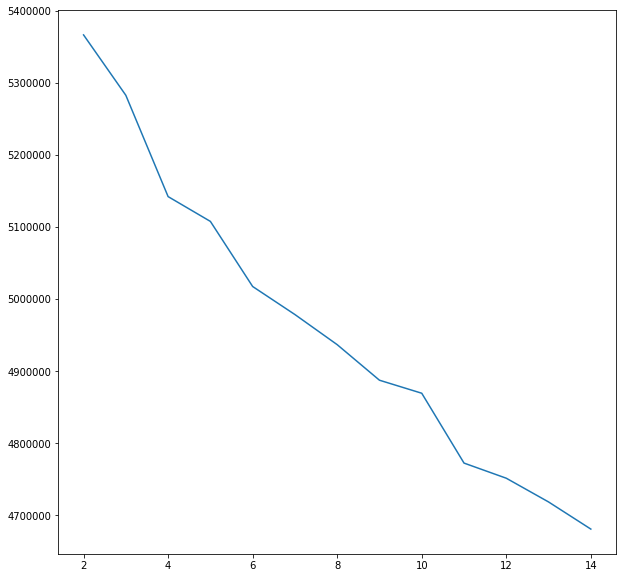

In [19]:
plt.figure(figsize=(10,10))
plt.plot(list(range(2,15)), [k.inertia_ for k in L])

In [22]:
results = pd.concat([pd.DataFrame(data = scale.inverse_transform(l.cluster_centers_), columns=df.columns) for l in L],axis=0)

# Si l'on s'intéresse au gamme de prix, on voit qu'avec K = 5, 5 Gammes se dégage encore clairement, au delà la distinction des nouvelles gammes est moins nette

In [23]:
pd.DataFrame(data = scale.inverse_transform(L[3].cluster_centers_), columns=df.columns)

,Host Since,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Calendar Updated,Availability 60,Review Scores Rating,Cancellation Policy,Reviews per Month,Entire home/apt,apartment,bed_breakfast,hoster,house,other,Amenities : Fire extinguisher,Amenities : Baby bath,Amenities : Washer,Amenities : Free parking on premises,Amenities : Cat(s),Amenities : Private living room,Amenities : Pool,Amenities : Cable TV,Amenities : Essentials,Amenities : Children’s dinnerware,Amenities : Washer / Dryer,Amenities : Keypad,Amenities : Crib,Amenities : Changing table,Amenities : First aid kit,Amenities : Internet,Amenities : Babysitter recommendations,Amenities : Gym,Amenities : 24-hour check-in,Amenities : Buzzer/wireless intercom,Amenities : translation missing: en.hosting_amenity_50,Amenities : Hangers,Amenities : Children’s books and toys,Amenities : Wireless Internet,Amenities : Fireplace guards,Amenities : Pets live on this property,Amenities : Air conditioning,Amenities : Kitchen,Amenities : Smoking allowed,Amenities : Paid parking off premises,Amenities : Shampoo,Amenities : Smoke detector,Amenities : Pack ’n Play/travel crib,Amenities : Other pet(s),Amenities : Table corner guards,Amenities : Game console,Amenities : Lock on bedroom door,Amenities : Free parking on street,Amenities : Dog(s),Amenities : Window guards,Amenities : Private entrance,Amenities : Self Check-In,Amenities : Stair gates,Amenities : Safety card,Amenities : High chair,Amenities : Lockbox,Amenities : Elevator in building,Amenities : Laptop friendly workspace,Amenities : Carbon monoxide detector,Amenities : TV,Amenities : Indoor fireplace,Amenities : Hair dryer,Amenities : Room-darkening shades,Amenities : Pets allowed,Amenities : Baby monitor,Amenities : Smartlock,Amenities : translation missing: en.hosting_amenity_49,Amenities : Family/kid friendly,Amenities : Dryer,Amenities : Heating,Amenities : Bathtub,Amenities : Wheelchair accessible,Amenities : Doorman Entry,Amenities : Suitable for events,Amenities : Hot tub,Amenities : Outlet covers,Amenities : Breakfast,Amenities : Doorman,Amenities : Iron,Host Verifications : phone,Host Verifications : government_id,Host Verifications : google,Host Verifications : selfie,Host Verifications : None,Host Verifications : sesame,Host Verifications : linkedin,Host Verifications : sent_id,Host Verifications : offline_government_id,Host Verifications : weibo,Host Verifications : reviews,Host Verifications : email,Host Verifications : manual_offline,Host Verifications : photographer,Host Verifications : facebook,Host Verifications : kba,Host Verifications : manual_online,Host Verifications : amex,Host Verifications : work_email,Features : Host Is Superhost,Features : Instant Bookable,Features : Require Guest Phone Verification,Features : Host Has Profile Pic,Features : Is Location Exact,Features : Require Guest Profile Picture,Features : Host Identity Verified,Neighbourhood Cleansed : Palais-Bourbon,Neighbourhood Cleansed : Observatoire,Neighbourhood Cleansed : Vaugirard,Neighbourhood Cleansed : Entrepôt,Neighbourhood Cleansed : Ménilmontant,Neighbourhood Cleansed : Bourse,Neighbourhood Cleansed : Hôtel-de-Ville,Neighbourhood Cleansed : Opéra,Neighbourhood Cleansed : Luxembourg,Neighbourhood Cleansed : Buttes-Montmartre,Neighbourhood Cleansed : Gobelins,Neighbourhood Cleansed : Popincourt,Neighbourhood Cleansed : Élysée,Neighbourhood Cleansed : Batignolles-Monceau,Neighbourhood Cleansed : Passy,Neighbourhood Cleansed : Temple,Neighbourhood Cleansed : Panthéon,Neighbourhood Cleansed : Louvre,Neighbourhood Cleansed : Buttes-Chaumont,Neighbourhood Cleansed : Reuilly,30 nearest POI average
0,2059.417783,2.597026,1.022490,0.789542,1.373418,0.875077,73.731535,183.766560,19.632850,1.283643,5.027651,41.459752,17.935849,92.558437,1.094937,1.555080,0.847425,0.963377,1.216665e-02,3.625415e-03,0.013088,0.007742,0.123879,3.336632e-17,0.747143,0.023350,1.954037e-02,6.206219e-03,1.53

> **Gamme 1** : *Grande propriété, haut de gamme* : Prix de référence : **233,73**. Fait pour accueillir un grand nombre de personnes (accomodation = 6, 2 salles de bain, 2-3 chambres, 4 vrais Lits, un prix plus élevé, et un nombre d'invité illimité : une maison fait pour la fête, une politique d'annulation plus strict que modéré. En général, une plus grande proportion de ces logements sont des maisons, ne s'adddresse pas au famille avec un enfant en bas-âge (aucun lit pour bébé), plus souvent air conditionné, ascenceur, piscine. On en trouve une plus grande proportion de logement dans le quartier du Louvre, Passy, Luxembourg

> **Gamme 2** : *Moyenne propriété, haut de gamme* : Prix de référence : **127,03**. Caractèristique très proche de la gamme 1 mais acceuille en général seulement 4 voir 5 personnes dans 2 ou 3 chambre, quasi-exclusivement des appartement également donc pas de piscine, on en trouve moins à Passy et plus dans le quatier des Gobelins, Montmartre, Temple

> **Gamme 3** : *Moyenne propriété, milieu de gamme* : Prix de référence : **95,52**. Logement pour 3 personnes, beaucoup moins apte à accueillir des évènement et + family friendly, Host avec nettemnt plus de moyen de vérification que les gammes en dessous, et des amenities de securités (smartlock, safety card) on les trouves un peu partout à Paris c'est la gamme la plus populaire en terme de Reviews/month

> **Gamme 4** : *Moyenne propriété, bas de gamme* : Prix de référence : **77,47**. Logement pour 2-3 personnes, politique d'annulation bien plus souple (entre flexible et modéré),beaucoup moins d'amenities que la gamme 3 (à part machine à laver, autorisation de fumer mais pas de détecteur de fumée pour le monoxide de carbon), pas beaucoup d'host vérifications. Ce sont des appartements que l'on trouve surtout à la Butte-Monmartre,Popincourt, au Ménilmontant, Note les plus basses, toute gamme confondu

> **Gamme 5** : *Petite propriété, respectable* : Prix de référence : **57,91**. Logement pour 2 personnesau maxium, Souvent 1 seul lit, parfois même pas un vrai lit, peu de frais de nettoyage et de personne supplémentaire. Politique d'annulation souple, une grosse proportion de location de chambre chez le propriétaire qui explique cette gamme, donc des B&B, possède les commodités de base sans les commodités de luxes. Plus grande proportion de SuperHost que la gamme 4. On les trouves dans le quartiers des Gobelins, Popincourt, Ménilmontant, Batignolles-Monceau

In [80]:
from sklearn import metrics

In [86]:
res_sil = metrics.silhouette_samples(X, res)

In [97]:
for l in L:
    print(metrics.silhouette_score(X, l.labels_))

0.060776519775476684
0.020150280635838513
0.0192836599421241
0.025848485206762303
0.016896544664580824
0.02245905449064182
0.0044980394540642486
0.008061535178657358
0.014916796876739892
0.01764603650280076
0.020570388810219675
0.007103849096105637
0.020111364199961058


In [99]:
score_sil = [0.060776519775476684,
0.020150280635838513,
0.0192836599421241,
0.025848485206762303,
0.016896544664580824,
0.02245905449064182,
0.0044980394540642486,
0.008061535178657358,
0.014916796876739892,
0.01764603650280076,
0.020570388810219675,
0.007103849096105637,
0.020111364199961058]

# Hierarchical Clustering

In [5]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [32]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

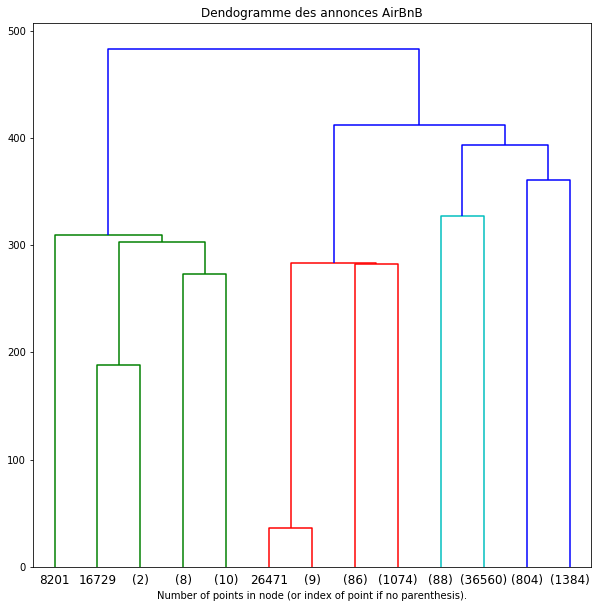

In [44]:
plt.figure(figsize=(10,10))

plt.title('Dendogramme des annonces AirBnB')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Nombre de points dans chaque noeuf (or index of point if no parenthesis).")
plt.show()

 # K-Medoid

In [25]:
from sklearn_extra.cluster import KMedoids

#### calcul trop long
KM = KMedoids(n_clusters=2, metric='l1') <br>
KM.fit(X) <br>
L.append(kmeans) <br>

# PCA

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## creations des 2 sous dataset pour variable non binaire et binaire

In [7]:
binary_cols = []
for col in df.columns:
    if len(df[col].value_counts().index) == 2:
        binary_cols.append(col)

In [8]:
X_binary = df[binary_cols]

In [9]:
scale = StandardScaler()

df_not_binary = df[[col for col in df.columns if col not in binary_cols]]

X_not_binary = scale.fit_transform(df_not_binary)

## PCA/MCA sur les 2 datasets

### PCA (équivalent MCA sur variable binaire)

In [11]:
pca_b = PCA()
pca_b = pca_b.fit(X_binary)

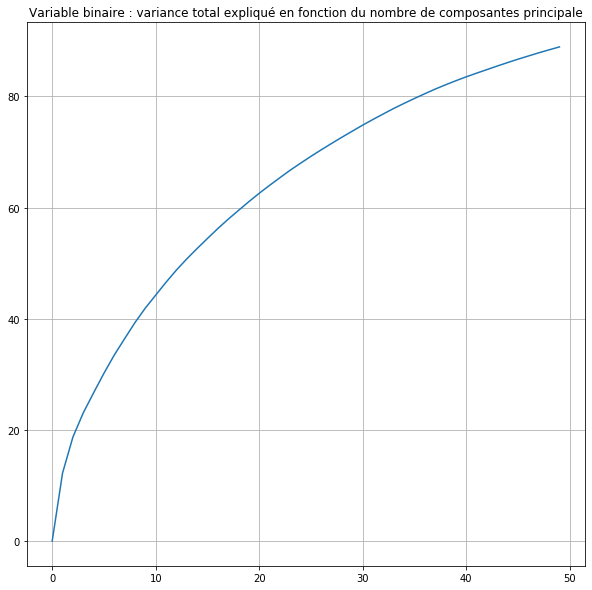

In [12]:
plt.figure(figsize=(10,10))
plt.title('Variable binaire : variance total expliqué en fonction du nombre de composantes principale')
plt.grid()
plt.plot(range(50), [pca_b.explained_variance_ratio_[:i].sum() * 100 for i in range(50)])

In [13]:
pca_b.explained_variance_ratio_[:25].sum()

0.6921892154614719

## PCA sur les variables continues

In [14]:
pca = PCA()
pca.fit(X_not_binary)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

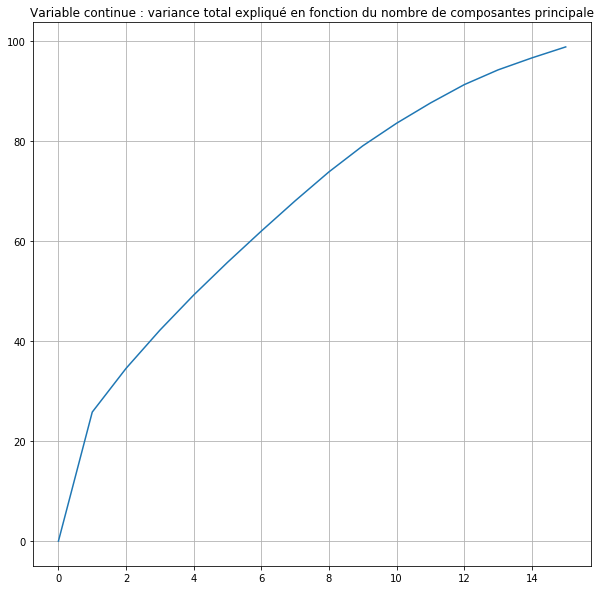

In [15]:
plt.figure(figsize=(10,10))
plt.title('Variable continue : variance total expliqué en fonction du nombre de composantes principale')
plt.grid()
plt.plot(range(16), [pca.explained_variance_ratio_[:i].sum() * 100 for i in range(16)])

In [16]:
pca.explained_variance_ratio_[:16].sum()

0.9999999999999999

# Mise sous forme de fonction

In [17]:
def create_data(df, n_a, n_b):

    scale = StandardScaler()
    df = pd.DataFrame(data=scale.fit_transform(df), columns=df.columns)
    pca_a = PCA(n_components=n_a)
    pca_b = PCA(n_components=n_b)
    
    binary_cols = []
    for col in df.columns:
        if len(df[col].value_counts().index) == 2:
            binary_cols.append(col)
    
    X_a = df[[col for col in df.columns if col not in binary_cols]]
    X_b = df[binary_cols]
    X_a = pca_a.fit_transform(X_a)
    X_b = pca_b.fit_transform(X_b)
    
    X = np.concatenate((X_a, X_b), axis=1)
    print(X.shape)
    return X, pca_a, pca_b
    

In [24]:
import os

In [25]:
os.path.abspath(os.path.join('cache'))

'C:\\Users\\Afiz\\Desktop\\IMSD\\Data_mining\\oral\\cache'

In [26]:
X, pca_a, pca_b = create_data(df, n_a=None, n_b=25)

(40028, 41)


In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
ac = AgglomerativeClustering(n_clusters=5,affinity='l1', linkage='complete', memory=os.path.abspath(os.path.join('cache')))

In [29]:
%%time
ac.fit(X)

Wall time: 10min 45s


AgglomerativeClustering(affinity='l1', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete',
                        memory='C:\\Users\\Afiz\\Desktop\\IMSD\\Data_mining\\oral\\cache',
                        n_clusters=5)

In [38]:
ac.compute_full_tree

'auto'

In [39]:
ac.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
res = ac.labels_

In [41]:
type(res)

numpy.ndarray

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(X, res)

0.9028169175288373

In [45]:
ac.children_.shapeape

(40027, 2)

In [50]:
pd.Series(ac.labels_).value_counts()

0    40015
1        9
4        2
3        1
2        1
dtype: int64

In [51]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

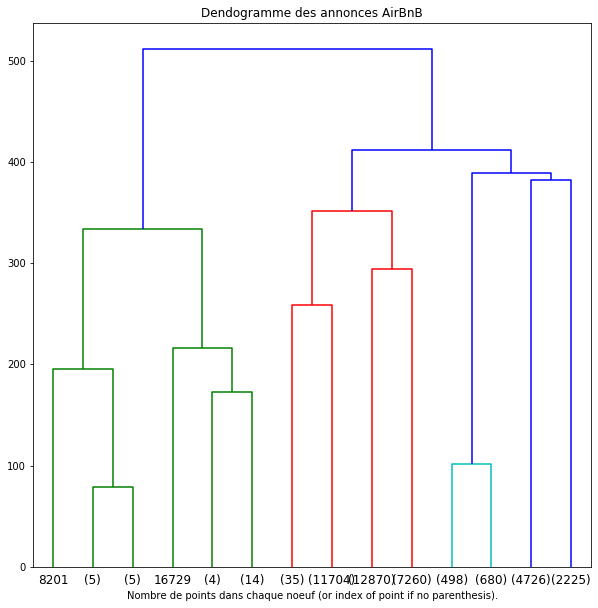

In [52]:
plt.figure(figsize=(10,10))

plt.title('Dendogramme des annonces AirBnB')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Nombre de points dans chaque noeuf (or index of point if no parenthesis).")
plt.show()